In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load =pd.read_csv("data/city_data.csv")
ride_data_to_load =pd.read_csv("data/ride_data.csv")


# Read the City and Ride Data
city_data_to_load
ride_data_to_load
# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data_to_load,city_data_to_load, on="city", how='left')

# Display the data table for preview
city_ride_data.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
combine_Cityride =city_ride_data.groupby(["city","type"])
#Average fare per city 
avgride_fare = combine_Cityride ["fare"].mean()
#print(avgride_fare)

#Total number of rides per city 
total_number = combine_Cityride["city"].count()
#print(total_number)

#Total Number of drivers per city 
total_driver = combine_Cityride["driver_count"].mean()
#total_driver

summery_df= pd.DataFrame({"Average fare": avgride_fare, "Total Number of rides":total_number,"Total driver":total_driver})
summery_df = summery_df.round(2)
summery_df.head()




,,Average fare,Total Number of rides,Total driver
city,type,,,
Amandaburgh,Urban,24.64,18,12
Barajasview,Urban,25.33,22,26
Barronchester,Suburban,36.42,16,11
Bethanyland,Suburban,32.96,18,22
Bradshawfurt,Rural,40.06,10,7


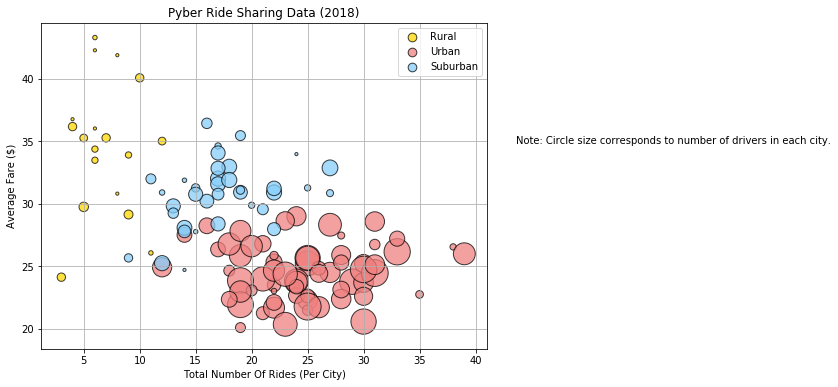

In [26]:
#Create seperate dataframe 
df_ride=summery_df.reset_index()
df_urban = df_ride.loc[df_ride["type"] == "Urban",:]
df_rural = df_ride.loc[df_ride["type"] == "Rural",:]
df_suburban=df_ride.loc[df_ride["type"] == "Suburban",:]

# Build the scatter plots for each city types
plt.scatter(df_rural["Total Number of rides"], df_rural['Average fare'], s = df_rural['Total driver']*10, alpha = .75, 
            color = 'gold', edgecolor = 'black', label = 'Rural')
plt.scatter(df_urban["Total Number of rides"], df_urban['Average fare'], s = df_urban['Total driver']*10, alpha = .75,
            color = '#F08080' , edgecolor = 'black', label = 'Urban')
plt.scatter(df_suburban["Total Number of rides"], df_suburban['Average fare'], s= df_suburban['Total driver']*10, alpha = .75,
           color = '#87CEFA', edgecolor = 'black', label = 'Suburban')

# Incorporate the other graph properties (axis title )
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2018)')
#plt.subtitle('Size: Total Drivers')
#plt.text(0.5,0.5,'test', horizontalalignment='center', verticalalignment='center' )
# Create a legend
plt.grid()
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.figtext(s = "Note: Circle size corresponds to number of drivers in each city.", x=.95, y=.6)
#plt.text('', '',"Note:" , fontdict=None, withdash=False)
# Save Figure
plt.show()

## Total Fares by City Type

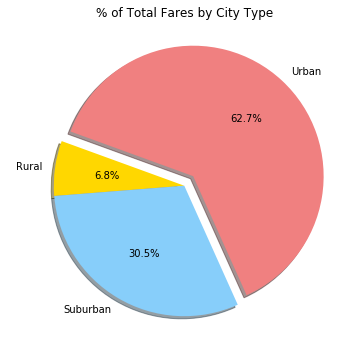

In [20]:
# Calculate Type Percents
combine_type= city_ride_data.groupby(["type"])
total_fare = combine_type ["fare"].sum()
fare_city_type = pd.DataFrame({"Total Fare":total_fare})
#fare_city_type

# Build Pie Chart
colors = [ "Gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
fare_city_type.plot(kind="pie",y=fare_city_type.keys(),explode=explode,colors=colors,
          autopct="%1.1f%%",startangle=160, title ="% of Total Fares by City Type", legend= False,shadow=True)
plt.axis('off')
# Save Figure
plt.savefig("% of Total Fares by City Type - Pie Chart.png")


## Total Rides by City Type

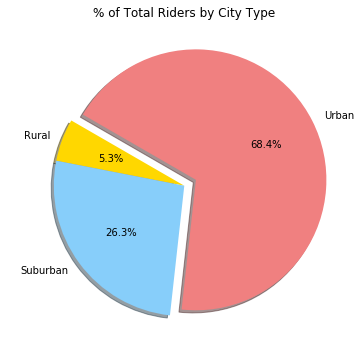

In [18]:
# Calculate Ride Percents
total_rides = combine_type["ride_id"].count()
ride_cityType= pd.DataFrame({"Total Rider":total_rides})
# Build Pie Chart
colors = [ "Gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
ride_cityType.plot(kind = "pie",y=ride_cityType.keys(), explode=explode,colors=colors,
          autopct="%1.1f%%",startangle=150, title ="% of Total Riders by City Type", legend= False,shadow=True)
plt.axis('off')

# Save Figure
plt.savefig("% of Total Riders by City Type - Pie Chart")


## Total Drivers by City Type

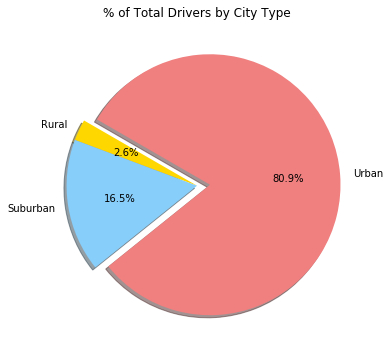

In [17]:
# Calculate Driver Percents
driver_cityType = df_ride.groupby("type")
total_driver =driver_cityType["Total driver"].sum()
summery_type = pd.DataFrame({"Total Drivers":total_driver})
summery_type
# Build Pie Charts
summery_type.plot(kind = "pie",y=summery_type.keys(), explode=explode,colors=colors,
          autopct="%1.1f%%",startangle=150, title ="% of Total Drivers by City Type", legend= False,shadow=True)
plt.axis('off')
# Save Figure
plt.savefig("% of Total Drivers by City Type - Pie Chart")
# Get current size
fig_size = plt.rcParams["figure.figsize"]
#fig_size
# Set figure width to 8 and height to 6
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.show()